<a href="https://colab.research.google.com/github/navneetpal07/dl-projects/blob/master/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Classification

In [ ]:
!pip install transformers
!pip install sentencepiece
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 17.0 MB/s eta 0:00:00


In [ ]:
!pip uninstall transformers sympy
!pip install transformers sympy

Found existing installation: transformers 4.48.3
Uninstalling transformers-4.48.3:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.11/dist-packages/transformers-4.48.3.dist-info/*
    /usr/local/lib/python3.11/dist-packages/transformers/*
Proceed (Y/n)? y
  Successfully uninstalled transformers-4.48.3
Found existing installation: sympy 1.13.1
Uninstalling sympy-1.13.1:
  Would remove:
    /usr/local/bin/isympy
    /usr/local/lib/python3.11/dist-packages/isympy.py
    /usr/local/lib/python3.11/dist-packages/sympy-1.13.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/sympy/*
    /usr/local/share/man/man1/isympy.1
Proceed (Y/n)? y
  Successfully uninstalled sympy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 74.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not curren

In [ ]:
from transformers import pipeline
import pandas as pd

In [ ]:
classifier = pipeline("text-classification")
text = "We can be good friends"
outputs = classifier(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,label,score
0,POSITIVE,0.99987


### Using another model rather than default one - Text Classification

In [ ]:
classifier = pipeline("text-classification", model = "SamLowe/roberta-base-go_emotions")

text = "We can be good friends"
outputs = classifier(text)
pd.DataFrame(outputs)


Device set to use cpu


,label,score
0,approval,0.340816


## Named Enitity Recognition (NER)

In [ ]:
ner_tagger = pipeline("ner",aggregation_strategy="simple")
text = "My name is Navneet Pal. I work for Cloudsurfe"

outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu


,entity_group,score,word,start,end
0,PER,0.996007,Navneet Pal,11,22
1,ORG,0.986934,Cloudsurfe,35,45


### using another model rather than default one - Token Classification

In [ ]:
ner_tagger = pipeline("ner",aggregation_strategy="simple", model="ml6team/keyphrase-extraction-kbir-inspec")
text = """Mars, the fourth planet from the Sun, is often called the Red Planet due to its iron oxide-rich surface. About half the size of Earth, it has a thin atmosphere primarily composed of carbon dioxide. Mars experiences extreme temperatures and features the largest volcano, Olympus Mons, and the deepest canyon, Valles Marineris.

Evidence suggests Mars once had liquid water, with river valleys and ice caps pointing to a wetter past. While no definitive proof of life has been found, seasonal water flows increase possibilities. Exploration began in the 1960s, with rovers like Perseverance actively searching for signs of ancient life.

NASA, SpaceX, and other agencies aim to send humans to Mars, facing challenges like radiation and low gravity. With advancing technology, Mars remains a beacon of human ambition, offering opportunities for discovery and potential colonization in the near future."""


outputs = ner_tagger(text)
pd.DataFrame(outputs)

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cpu


,entity_group,score,word,start,end
0,KEY,0.999874,Mars,0,4
1,KEY,0.999237,Red Planet,58,68
2,KEY,0.999592,Mars,198,202
3,KEY,0.999936,Mars,345,349
4,KEY,0.867591,seasonal water flows,482,502
5,KEY,0.999468,Mars,691,695
6,KEY,0.999628,Mars,774,778
7,KEY,0.970799,colonization,866,878


## Question Answering

In [ ]:
text = """
I received the wrong package from Expressbees, and this is not what I ordered.
I need this issue resolved as soon as possible. Please check the delivery details and arrange for the correct package to be sent to me.
This mistake has caused inconvenience, and I need a quick resolution. Let me know the steps I should take to return the wrong package and receive the correct one.
I expect prompt action on this matter to avoid further delays. Please get back to me as soon as possible with a solution.
"""

reader = pipeline("question-answering",)
question = "what was wrong?"

outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,score,start,end,answer
0,0.06814,1,29,I received the wrong package


### using another model rather than default one - Question Answering

In [ ]:
text = """
I received the wrong package from Expressbees, and this is not what I ordered.
I need this issue resolved as soon as possible. Please check the delivery details and arrange for the correct package to be sent to me.
This mistake has caused inconvenience, and I need a quick resolution. Let me know the steps I should take to return the wrong package and receive the correct one.
I expect prompt action on this matter to avoid further delays. Please get back to me as soon as possible with a solution.
"""

reader = pipeline("question-answering",model="Intel/dynamic_tinybert")
question = "what was wrong?"

outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

Invalid model-index. Not loading eval results into CardData.


tokenizer_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


,score,start,end,answer
0,0.054487,1,46,I received the wrong package from Expressbees


## Summarization

In [ ]:
text = """
The train weaved through emerald hills, its rhythmic clatter lulling Maya into nostalgia. Across from her, a man met her gaze with a knowing smile. “We’ve met before,” he murmured. She frowned, uncertain.
As stations passed, memories surfaced—a childhood journey, a lost toy, a boy who had found it. Her heart pounded.
When the train slowed at her stop, she turned to speak, but he was gone, leaving only an old, faded ticket on her seat. She picked it up and gasped—it was the same one she had lost years ago. The past had found her again.
"""

In [ ]:
summarizer = pipeline("summarization")

outputs = summarizer(text)
outputs

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Your max_length is set to 142, but your input_length is only 141. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=70)


[{'summary_text': ' Maya\'s train weaved through emerald hills, its rhythmic clatter lulling her into nostalgia . Across from her, a man met her gaze with a knowing smile . "We\'ve met before,” he murmured . She frowned, uncertain, but he was gone, leaving only an old, faded ticket .'}]

In [ ]:
outputs[0]['summary_text']

' Maya\'s train weaved through emerald hills, its rhythmic clatter lulling her into nostalgia . Across from her, a man met her gaze with a knowing smile . "We\'ve met before,” he murmured . She frowned, uncertain, but he was gone, leaving only an old, faded ticket .'

### using another model rather than default one - summarization

In [ ]:
summarizer = pipeline("summarization",model="Falconsai/medical_summarization")
text = """
The use of computed tomography (CT) imaging in patients with metal implants, such as orthopedic prostheses or dental fillings, presents a significant challenge in modern medical diagnostics. It is estimated that over 90% of individuals receiving joint replacements will require some form of CT imaging in their lifetime. However, metallic implants frequently cause artifacts that can degrade image quality and obscure critical anatomical structures.
A recent study published by the European Radiology Association evaluated the impact of different metal artifact reduction (MAR) techniques on image quality in patients with orthopedic implants. Traditional CT scans often produce severe streak artifacts due to photon starvation, beam hardening, and scatter effects, making accurate diagnosis difficult. Various methods, such as dual-energy CT, iterative reconstruction, and MAR algorithms, have been developed to address these limitations.
One promising approach is dual-energy CT, which utilizes two different X-ray energy levels to differentiate materials based on their attenuation properties. This method has been shown to significantly reduce artifacts while preserving soft tissue contrast. Additionally, iterative reconstruction techniques, which refine image data through multiple processing cycles, have demonstrated improvements in spatial resolution and noise reduction.
Despite these advances, challenges remain in standardizing MAR techniques across different CT manufacturers and scanning protocols. Furthermore, certain implants, such as titanium-based prostheses, respond better to MAR algorithms compared to cobalt-chromium alloys, which produce more severe artifacts. The literature suggests that careful selection of CT parameters, combined with post-processing techniques, can optimize image quality in patients with metal implants.
"""

outputs = summarizer(text)
outputs

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cuda:0


[{'summary_text': 'the use of computed tomography (CT) imaging in patients with metal implants presents a significant challenge in modern medical diagnostics . traditional CT scans often produce severe streak artifacts due to photon starvation, beam hardening, and scatter effects , making accurate diagnosis difficult . Various methods, such as dual-energy CT, iterative reconstruction, and MAR algorithms, have been developed to address these limitations . however, challenges remain in standardizing MAR techniques across different CT manufacturers and scanning protocols . the literature suggests that careful selection of CT parameters, combined with post-processing techniques, can optimize image quality and obscure critical anatomical structures .'}]

In [ ]:
outputs[0]['summary_text']

'the use of computed tomography (CT) imaging in patients with metal implants presents a significant challenge in modern medical diagnostics . traditional CT scans often produce severe streak artifacts due to photon starvation, beam hardening, and scatter effects , making accurate diagnosis difficult . Various methods, such as dual-energy CT, iterative reconstruction, and MAR algorithms, have been developed to address these limitations . however, challenges remain in standardizing MAR techniques across different CT manufacturers and scanning protocols . the literature suggests that careful selection of CT parameters, combined with post-processing techniques, can optimize image quality and obscure critical anatomical structures .'

## Text Generation

In [ ]:
from transformers import set_seed
set_seed(0)

In [ ]:
generator = pipeline("text-generation")

prompt = "There was a lion "
outputs = generator(prompt, max_length=128, truncation=True)

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
outputs

[{'generated_text': 'There was a lion urn in his house. After all, why should the man make one of these? The house he has built on this land was in a state of disgrace from the time he was born until his early age. The house had long served for its own use, but it was not used for the purpose, and even then, for the purposes of its own self-preservation. The place was also condemned. A few years later, at the age of thirty-seven, the city council, upon recommendation of their council, recommended that the city take up the removal, and build a new house with white stone,'}]

### using another model rather than default one - Text Classification

In [ ]:
generator = pipeline("text-generation",model="openai-community/gpt2-large")

prompt = "I was watching a anime "
outputs = generator(prompt,max_length=128, truncation=True)

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
outputs

[{'generated_text': 'I was watching a anime ㅋㅋㅋ\n"He who gets a glimpse from this can stand as first to step out of the window."\nHands down first to step out of the window.\n"I\'ve heard it\'s the hottest summer since summer school\n"I\'ve seen that people on the outside are wearing suits today\n"I think that day is going to be pretty hot."\nMy head hurts ㅋㅋ\n"M, my knees hurt too"\n"My right eye is itching"\n"I think a hot summer is on the way"\n"The last 3 days are gonna be just wonderful"\n'}]

## Translation

In [ ]:
translator = pipeline("translation_en_to_de")

outputs = translator(text)
outputs

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'translation_text': 'Hallo, könnt Ihr alle Wunder der Welt benennen und auch erwähnen, welches das teuerste ist?'}]

### using another model rather than default one - Translation

In [ ]:
translator = pipeline("translation_en_to_jap",model="Helsinki-NLP/opus-mt-en-jap")

outputs = translator(text)
outputs

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/274M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/274M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/509k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

Device set to use cuda:0


[{'translation_text': '彼 は あなた を 世 の すべて の 奇跡 と , あなた に 並 ぶ 者 の よう に 思 わ れ る で しょ う か .'}]

## Image Classification

#### For the nlp tasks the input text were converted into the embedding and then passed to the pipeline but for the Image classification we pass pixels RGB(0-250)

In [19]:
from PIL import Image
import requests
from transformers import pipeline

In [ ]:
url = "https://i.guim.co.uk/img/media/4d0f923cabd79164de35a96dd875a948be56e199/0_0_1720_1032/master/1720.jpg?width=1200&quality=85&auto=format&fit=max&s=b26ca47c844abe3e317ae73073a6a944"
image = Image.open(requests.get(url, stream=True).raw)

In [ ]:
classifier = pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


In [ ]:
outputs = classifier(image)
outputs

[{'label': 'mousetrap', 'score': 0.1900189369916916},
 {'label': 'face powder', 'score': 0.06689941883087158},
 {'label': 'guinea pig, Cavia cobaya', 'score': 0.06237350404262543},
 {'label': 'mink', 'score': 0.04629041254520416},
 {'label': 'hamster', 'score': 0.033330824226140976}]

### using another model rather than default one - Image Classification

In [24]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Taylor_Swift_at_the_Golden_Globes_2024_%28Enhanced%2C_cropped%29_2.jpg/1200px-Taylor_Swift_at_the_Golden_Globes_2024_%28Enhanced%2C_cropped%29_2.jpg"
image = Image.open(requests.get(url, stream=True).raw)

classifier = pipeline("image-classification",model="dima806/celebs_face_image_detection")
outputs = classifier(image)
outputs


Device set to use cuda:0


[{'label': 'Taylor Swift', 'score': 0.9276129603385925},
 {'label': 'Ursula Corbero', 'score': 0.8605414628982544},
 {'label': 'Amber Heard', 'score': 0.7307851910591125},
 {'label': 'Zendaya', 'score': 0.7215809226036072},
 {'label': 'Katharine Mcphee', 'score': 0.7180936932563782}]

## Image Segmentation

In [26]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Taylor_Swift_at_the_Golden_Globes_2024_%28Enhanced%2C_cropped%29_2.jpg/1200px-Taylor_Swift_at_the_Golden_Globes_2024_%28Enhanced%2C_cropped%29_2.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [27]:
segmenter = pipeline("image-segmentation",model="mattmdjaga/segformer_b2_clothes")
outputs = segmenter(image)
outputs

config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Device set to use cuda:0


[{'score': None,
  'label': 'Background',
  'mask': <PIL.Image.Image image mode=L size=1200x1801>},
 {'score': None,
  'label': 'Hair',
  'mask': <PIL.Image.Image image mode=L size=1200x1801>},
 {'score': None,
  'label': 'Sunglasses',
  'mask': <PIL.Image.Image image mode=L size=1200x1801>},
 {'score': None,
  'label': 'Dress',
  'mask': <PIL.Image.Image image mode=L size=1200x1801>},
 {'score': None,
  'label': 'Belt',
  'mask': <PIL.Image.Image image mode=L size=1200x1801>},
 {'score': None,
  'label': 'Face',
  'mask': <PIL.Image.Image image mode=L size=1200x1801>},
 {'score': None,
  'label': 'Left-arm',
  'mask': <PIL.Image.Image image mode=L size=1200x1801>},
 {'score': None,
  'label': 'Right-arm',
  'mask': <PIL.Image.Image image mode=L size=1200x1801>}]

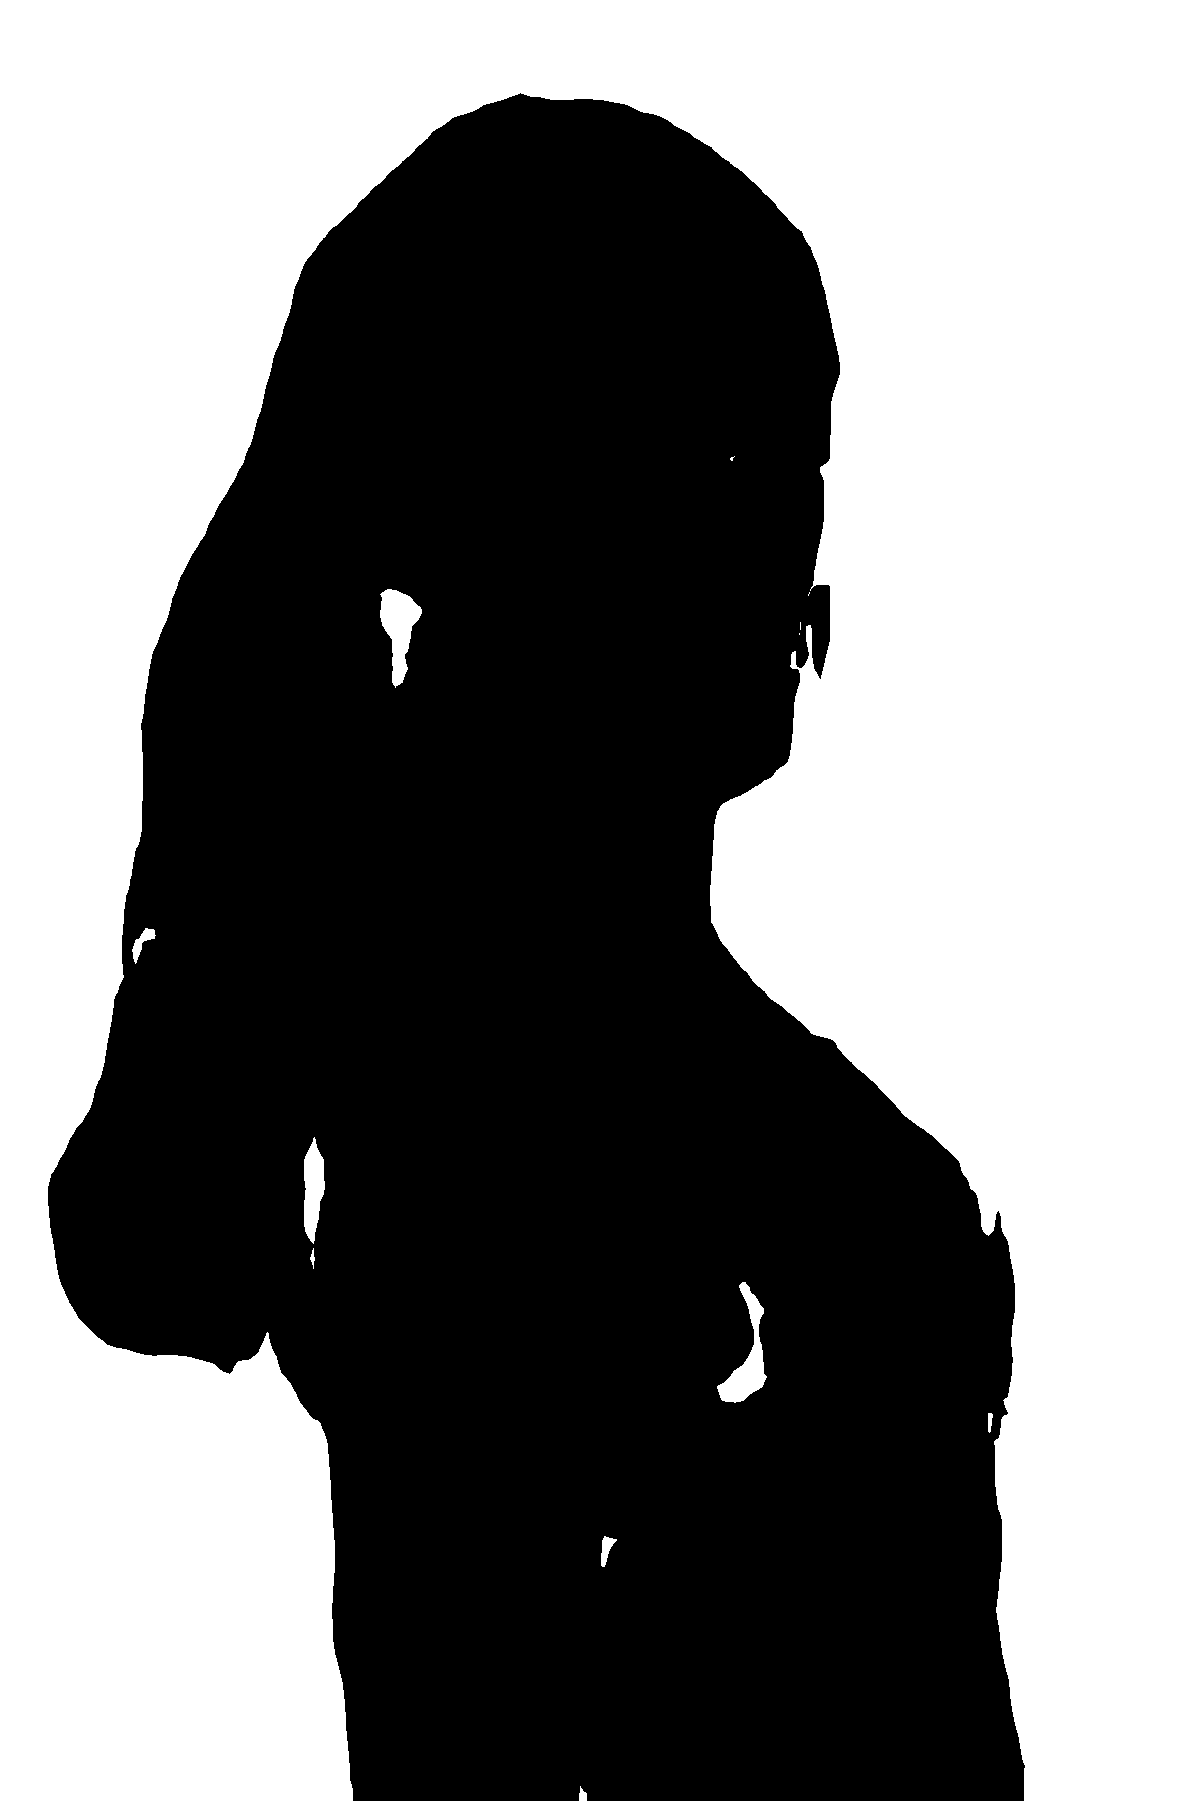

In [38]:
outputs[0]['mask']

## Text to Speech

In [40]:
import transformers
transformers.__version__

'4.48.3'

In [41]:
import soundfile as sf

In [42]:
text = """
Hairy mice engineered to have mammoth-like traits are part of genetic experiments aimed at understanding extinct species and possibly aiding in de-extinction efforts.
Scientists have modified the genes of mice to express traits from woolly mammoths, such as thick hair, by inserting mammoth DNA sequences into their genome.
This research, often led by teams working on resurrecting extinct species, helps scientists study how certain genes contribute to cold adaptation and other evolutionary traits.
Such work could eventually contribute to bringing back mammoth-like creatures or preserving endangered species.
"""

In [43]:
synth = pipeline("text-to-speech")

No model was supplied, defaulted to suno/bark-small and revision 1dbd7a1 (https://huggingface.co/suno/bark-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/8.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/encodec/modeling_encodec.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)


model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [44]:
speech = synth(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [45]:
speech

{'audio': array([[ 0.01989337,  0.01438386,  0.01470651, ..., -0.00195293,
         -0.00064913,  0.00019674]], dtype=float32),
 'sampling_rate': 24000}

In [ ]:
sf.write("speech.wav", speech["audio"].T, samplerate=speech['sampling_rate'])

## Text to Music

In [49]:
synth = pipeline("text-to-audio", "facebook/musicgen-small")
text = "A heart-wrenching Bollywood ballad with deep piano, violin, and haunting flute"

music = synth(text, forward_params={"do_sample":True})


Config of the text_encoder: <class 'transformers.models.t5.modeling_t5.T5EncoderModel'> is overwritten by shared text_encoder config: T5Config {
  "_name_or_path": "t5-base",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_be

In [52]:
# sf.write("music.wav", data=music["audio"].T, samplerate=music['sampling_rate'])
import scipy
scipy.io.wavfile.write("music.wav",rate=music["sampling_rate"], data=music['audio'])